In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow.keras import datasets

In [2]:
(train_img, train_label),(test_img, test_label) = datasets.mnist.load_data()

In [3]:
num_classes = 10
img_height = 28
img_width = 28
num_channels = 1

In [4]:
train_img = train_img.reshape(train_img.shape[0],img_height, img_width,num_channels)
test_img = test_img.reshape(test_img.shape[0],img_height, img_width,num_channels)

In [5]:
print(f"Training images shape is = {train_img.shape}")
print(f"Training labels shape is = {train_label.shape}")
print(f"Testing images shape is = {test_img.shape}")
print(f"Testing labels shape is = {test_label.shape}")

Training images shape is = (60000, 28, 28, 1)
Training labels shape is = (60000,)
Testing images shape is = (10000, 28, 28, 1)
Testing labels shape is = (10000,)


## LeNet-5 Architecture : 
![LeNet-5 Architecture](LeNet5.png)

Since, training dataset has images of size 28 * 28, we have to convert them to 32 * 32

In [6]:
train_img = np.pad(train_img, pad_width=((0,0),(2, 2), (2, 2),(0,0)), mode='constant', constant_values=0)
test_img = np.pad(test_img, pad_width=((0,0),(2, 2), (2, 2),(0,0)), mode='constant', constant_values=0)

In [7]:
print(f"Training images shape is = {train_img.shape}")
print(f"Training labels shape is = {train_label.shape}")
print(f"Testing images shape is = {test_img.shape}")
print(f"Testing labels shape is = {test_label.shape}")

Training images shape is = (60000, 32, 32, 1)
Training labels shape is = (60000,)
Testing images shape is = (10000, 32, 32, 1)
Testing labels shape is = (10000,)


In [8]:
np.unique(train_img[0].reshape(-1))

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [9]:
train_img = train_img/255.0
test_img = test_img/255.0

In [10]:
np.unique(train_img[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

All images converted to grayscale images. i.e. pixel values are now in between 0 and 1 only

In [11]:
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
# define the model as a class
class LeNet:
    # INPUT => CONV => TANH => AVG-POOL => CONV => TANH => AVG-POOL => FC => TANH => FC => TANH => FC => SMAX
    @staticmethod
    def init(numChannels, imgRows, imgCols, numClasses, weightsPath=None):
        # if we are using "channels first", update the input shape
        if backend.image_data_format() == "channels_first":
            inputShape = (numChannels, imgRows, imgCols)
        else:  # "channels last"
            inputShape = (imgRows, imgCols, numChannels)

        # initialize the model
        model = models.Sequential()

        
        model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1),
                padding="valid", activation=tf.nn.tanh, input_shape=inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        
        model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1),
                padding="valid", activation=tf.nn.tanh))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        
        model.add(layers.Flatten())

        model.add(layers.Dense(units=120, activation=tf.nn.tanh))

        model.add(layers.Dense(units=84, activation=tf.nn.tanh))

        model.add(layers.Dense(units=numClasses, activation=tf.nn.softmax))

        # if a weights path is supplied (inicating that the model was
        # pre-trained), then load the weights
        if weightsPath is not None:
            model.load_weights(weightsPath)

        # return the constructed network architecture
        return model

In [13]:
# parameters for training data set
num_classes = 10
image_width = 32
image_height = 32
image_channels = 1

In [14]:
model = LeNet.init(numChannels=image_channels,
                    imgRows=image_height, imgCols=image_width,
                    numClasses=num_classes,
                    weightsPath=None)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.01), 
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

model.summary()

c:\Users\shory\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# define callback function for training termination criteria
#accuracy_cutoff = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

# initialize training config
batch_size = 128
epochs = 100

# run training
history = model.fit(x=train_img, y=train_label, validation_data=(test_img, test_label),
        batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[myCallback()])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5141 - loss: 1.6475 - val_accuracy: 0.8640 - val_loss: 0.5632
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8672 - loss: 0.5211 - val_accuracy: 0.8980 - val_loss: 0.3888
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8949 - loss: 0.3891 - val_accuracy: 0.9110 - val_loss: 0.3249
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9055 - loss: 0.3303 - val_accuracy: 0.9189 - val_loss: 0.2872
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9140 - loss: 0.2929 - val_accuracy: 0.9255 - val_loss: 0.2593
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9212 - loss: 0.2681 - val_accuracy: 0.9336 - val_loss: 0.2378
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9269 - loss: 0.2469 - val_accuracy: 0.9385 - val_loss: 0.2185
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9318 - loss: 0.2305 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

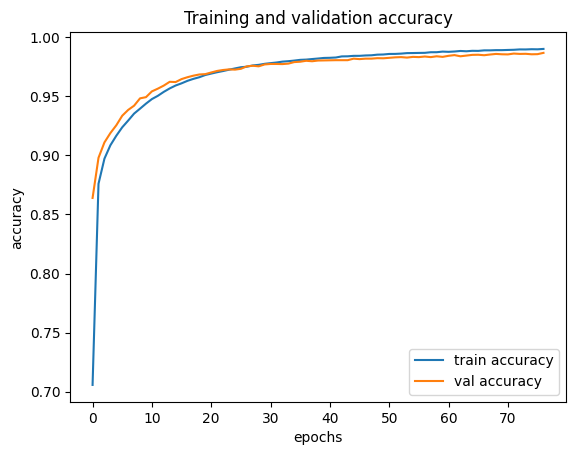

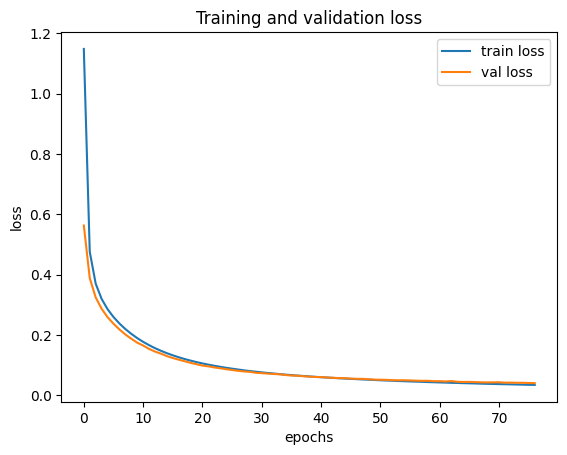

In [16]:
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # get number of epochs

# plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

# plot training and validation loss per epoch
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')

In [17]:
batch_size = 128
model.evaluate(test_img, test_label, batch_size=batch_size, verbose=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0479


[0.04064856097102165, 0.9868000149726868]

In [18]:
model.save_weights("LeNet5.weights.h5")
model.save("LeNet5.h5")

## Evaluate via Pre-trained Model weights

In [19]:
# init model and load the model weights
model = LeNet.init(numChannels=image_channels, 
                    imgRows=image_height, imgCols=image_width,
                    numClasses=num_classes,
                    weightsPath="LeNet5.weights.h5")

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

In [20]:
batch_size =128
model.evaluate(test_img, test_label, batch_size=batch_size, verbose=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0479


[0.04064856097102165, 0.9868000149726868]

## Evaluate Pre-Trained Model

In [31]:
model = models.load_model("LeNet5.h5")

# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

batch_size =128
model.evaluate(test_img, test_label, batch_size=batch_size, verbose=1)

TypeError: Error when deserializing class 'Dense' using config={'name': 'dense_2', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}, 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Could not interpret activation function identifier: {'module': 'builtins', 'class_name': 'function', 'config': 'softmax_v2', 'registered_name': 'function'}

**Maybe this error is because I used tanh activation!** 
* **I have other models as well trained with relu activation, an when I loaded the model this way, it doesn't throws this error**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


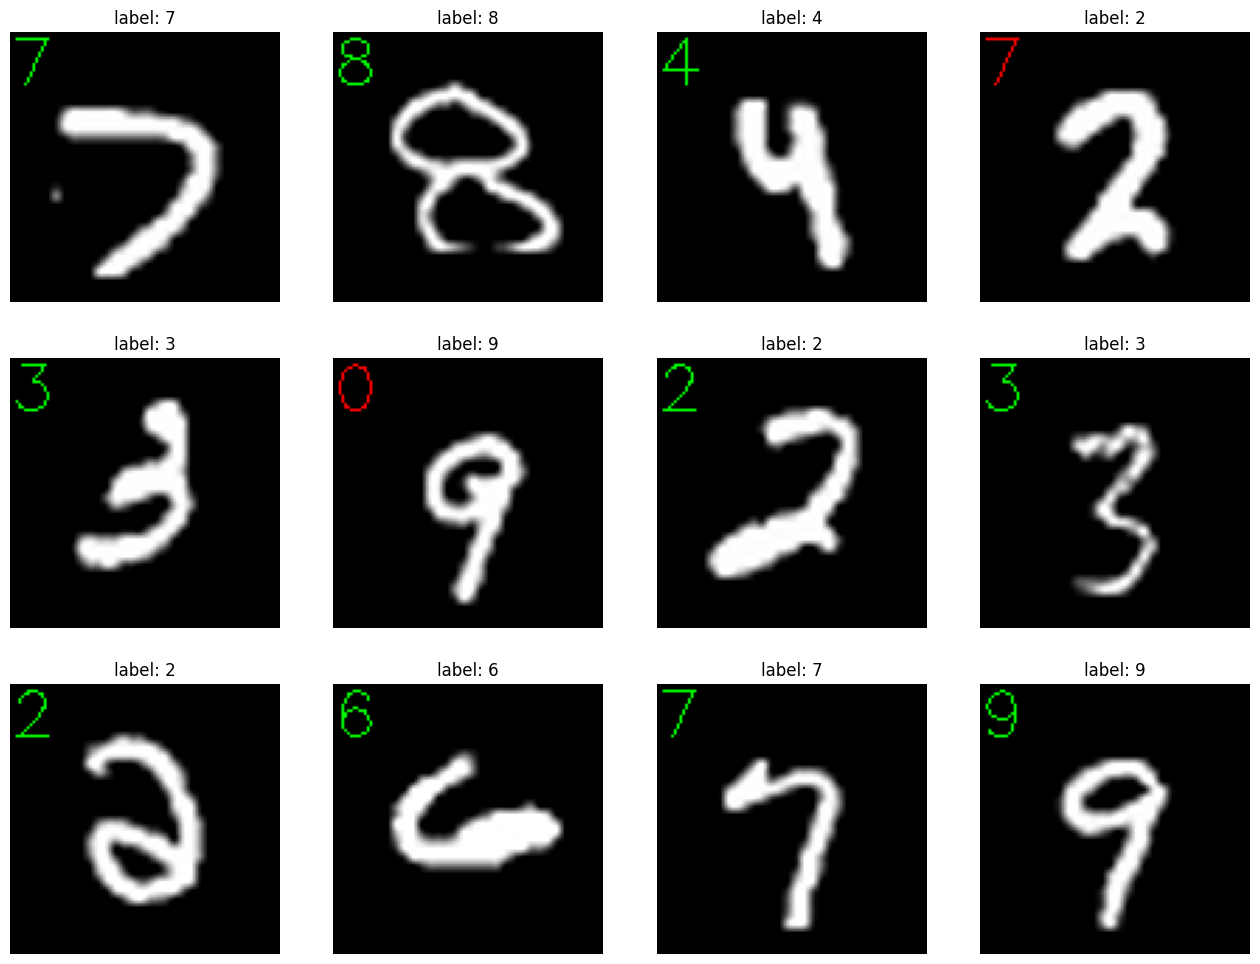

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# set up matplotlib fig, and size it to fit 3x4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly select a few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0, len(test_label)), size=(num_predictions,))
test_images = np.stack(([test_img[i] for i in test_indices]))
test_labels = np.stack(([test_label[i] for i in test_indices]))

# compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # resize the image from a 28 x 28 image to a 96 x 96 image so we can better see it
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # convert grayscale image to RGB color
    image = cv2.merge([image] * 3)

    # select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0, 255, 0) # green for correct predictions
    else:
        rgb_color = (255, 0, 0) # red for wrong predictions

    # show the image and prediction
    cv2.putText(image, str(prediction), (0, 18),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, rgb_color, 1)
    
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="label: %s" % test_labels[i])
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(image)

# show figure matrix
plt.show()